# Mid-Course Project | Exploratory Data Analysis

The FICS.org online database contains a set of games payed between humans as well as humans and computers. The data export for this project contains all games played on FICS.org in January 2021.

The number of games per month on FICS dropped off significantly after that date.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Selecting Useful Columns

The dataset contains the following columns:

- game - an arbitrary index created during the data preparation phase
- Black - the username of the Black player
- BlackElo - the rating of Black https://www.chess.com/terms/elo-rating-chess
- BlackRD - an indicator of the variablility in Black's ELO
- Date - the date of the game
- ECO - a standardised descriptor of the opening sequence https://www.365chess.com/eco.php
- Event - the type of game, rated/unrated and it's format
- Movetext - the sequence of moves played
- Result - 1-0 White win / 0.5-0.5 draw / 0-1 Black win
- Site - data source
- Time - the time of the game start
- TimeControl - the starting time given to each player in seconds + the bonus time gained in seconds after each move
- White - the username of the White player
- WhiteElo - the rating of White
- WhiteRD - an indicator of the variablility in White's ELO
- BlackClock - the amount of time that Black started with
- BlackIsComp - an indicator that Black is a computer bot
- FICSGamesDBGameNo - the FICS database game number
- PlyCount - the number of moves taken
- WhiteClock - the amount of time that White started with
- WhiteIsComp - an indicator that White is a computer bot

In [2]:
fics = pd.read_csv('./Processed Data/data_fics2_prepared.csv')
display(fics.head())
fics.shape

C:\Users\eliza\AppData\Local\Temp\ipykernel_16620\2807151115.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  fics = pd.read_csv('./Processed Data/data_fics2_prepared.csv')


game           Black BlackClock  BlackElo BlackIsComp  BlackRD        Date  \
0     0       AlexBaban    05:00.0      1696         NaN     48.0  2018.01.31   
1     1     youngwalrus    12:00.0      1818         NaN     36.9  2018.01.31   
2     2      wollongong    03:00.0      1495         NaN     33.6  2018.01.31   
3     3         steward    15:00.0      1470         NaN     32.2  2018.01.31   
4     4  JosephAquilino    01:00.0      1410         NaN     32.4  2018.01.31   

   ECO                     Event  FICSGamesDBGameNo  ... Result  \
0  A00     FICS rated blitz game          430765295  ...    1-0   
1  D06  FICS rated standard game          430765294  ...    0-1   
2  B07     FICS rated blitz game          430765293  ...    1-0   
3  D06  FICS rated standard game          430765292  ...    1-0   
4  C44     FICS rated blitz game          430765291  ...    1-0   

                 Site      Time TimeControl Variant     White WhiteClock  \
0  FICS freechess.org  23:52:00       300+0     NaN  jaromsal    05:00.0   
1  FICS freechess.org  23:29:00      720+10     NaN      Uris    12:00.0   
2  FICS freechess.org  23:54:00       180+0     NaN     Eraza    03:00.0   
3  FICS freechess.org  23:53:00       900+0     NaN   malotfi    15:00.0   
4  FICS freechess.org  23:44:00       60+10     NaN  TipZilla    01:00.0   

  WhiteElo WhiteIsComp  WhiteRD  
0     1704         NaN     18.0  
1     1679         NaN     40.7  
2     1553         NaN     17.6  
3     1422         NaN    140.5  
4     1264         NaN     42.6  

[5 rows x 22 columns]

(753543, 22)

In [3]:
fics.columns

Index(['game', 'Black', 'BlackClock', 'BlackElo', 'BlackIsComp', 'BlackRD',
       'Date', 'ECO', 'Event', 'FICSGamesDBGameNo', 'Movetext', 'PlyCount',
       'Result', 'Site', 'Time', 'TimeControl', 'Variant', 'White',
       'WhiteClock', 'WhiteElo', 'WhiteIsComp', 'WhiteRD'],
      dtype='object')

In [4]:
cols = []
for i in range(len(fics.columns)):
    cols.append(fics.columns[i].lower().replace(' ', '_'))
fics.columns = cols
fics.columns

Index(['game', 'black', 'blackclock', 'blackelo', 'blackiscomp', 'blackrd',
       'date', 'eco', 'event', 'ficsgamesdbgameno', 'movetext', 'plycount',
       'result', 'site', 'time', 'timecontrol', 'variant', 'white',
       'whiteclock', 'whiteelo', 'whiteiscomp', 'whiterd'],
      dtype='object')

The FICS dataset contains 753543 games.

There is redundant information to remove before analysis (see workings below):

'game', 'black', 'site', 'white' and 'ficsgamesdbgameno' do not contain useful information. 'blackclock' and 'whiteclock' contain information already encoded within 'timecontrol'. These can all be removed.

'blackiscomp' can only ever be True when 'whiteiscomp' is False and vice versa. There are rows where both are not True. Therefore these two columns can be consolidated into one.

We will also split the 'timecontrol' values by the + delimiter.

In [5]:
fics.groupby(['event','timecontrol','whiteclock','blackclock']).agg({'game':pd.Series.nunique})

game
event                      timecontrol whiteclock blackclock      
FICS rated blitz game      0+10        00:10.0    00:10.0       68
                           0+12        00:10.0    00:10.0       95
                           0+14        00:10.0    00:10.0        2
                           0+15        00:10.0    00:10.0       77
                           0+17        00:10.0    00:10.0       10
...                                                            ...
FICS unrated standard game 900+20      15:00.0    15:00.0        2
                           900+3       15:00.0    15:00.0        6
                           900+30      15:00.0    15:00.0       16
                           900+5       15:00.0    15:00.0      159
FICS unrated untimed game  0+0         0          0              8

[523 rows x 1 columns]

In [6]:
fics[fics['blackclock']!=fics['whiteclock']]

Empty DataFrame
Columns: [game, black, blackclock, blackelo, blackiscomp, blackrd, date, eco, event, ficsgamesdbgameno, movetext, plycount, result, site, time, timecontrol, variant, white, whiteclock, whiteelo, whiteiscomp, whiterd]
Index: []

[0 rows x 22 columns]

In [7]:
fics['site'].value_counts()

FICS freechess.org    753543
Name: site, dtype: int64

In [8]:
display(len(fics))
display(len(fics[fics['blackiscomp']=='Yes']))
display(len(fics[fics['whiteiscomp']=='Yes']))
display(len(fics[(fics['blackiscomp']=='Yes')&(fics['whiteiscomp']=='Yes')]))

753543

41510

41035

2045

In [9]:
fics = fics.drop(['game', 'black', 'site', 'white','ficsgamesdbgameno','blackclock','whiteclock'],axis=1)
fics.head()

blackelo blackiscomp  blackrd        date  eco                     event  \
0      1696         NaN     48.0  2018.01.31  A00     FICS rated blitz game   
1      1818         NaN     36.9  2018.01.31  D06  FICS rated standard game   
2      1495         NaN     33.6  2018.01.31  B07     FICS rated blitz game   
3      1470         NaN     32.2  2018.01.31  D06  FICS rated standard game   
4      1410         NaN     32.4  2018.01.31  C44     FICS rated blitz game   

                                            movetext  plycount result  \
0  1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...        65    1-0   
1  1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...        68    0-1   
2  1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...        77    1-0   
3  1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...        33    1-0   
4  1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...        83    1-0   

       time timecontrol variant  whiteelo whiteiscomp  whiterd  
0  23:52:00       300+0     NaN      1704         NaN     18.0  
1  23:29:00      720+10     NaN      1679         NaN     40.7  
2  23:54:00       180+0     NaN      1553         NaN     17.6  
3  23:53:00       900+0     NaN      1422         NaN    140.5  
4  23:44:00       60+10     NaN      1264         NaN     42.6

In [10]:
def comp_clean(row):
    if ((row['blackiscomp'] == 'Yes') & (row['whiteiscomp'] == 'Yes')):
        return 'Both'
    elif row['blackiscomp'] == 'Yes':
        return 'Black'
    elif row['whiteiscomp'] == 'Yes':
        return 'White'
    else:
        return 'None'
        
fics['computer'] = fics.apply(comp_clean, axis=1)

fics = fics.drop(['blackiscomp','whiteiscomp'],axis=1)
fics.head()

blackelo  blackrd        date  eco                     event  \
0      1696     48.0  2018.01.31  A00     FICS rated blitz game   
1      1818     36.9  2018.01.31  D06  FICS rated standard game   
2      1495     33.6  2018.01.31  B07     FICS rated blitz game   
3      1470     32.2  2018.01.31  D06  FICS rated standard game   
4      1410     32.4  2018.01.31  C44     FICS rated blitz game   

                                            movetext  plycount result  \
0  1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...        65    1-0   
1  1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...        68    0-1   
2  1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...        77    1-0   
3  1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...        33    1-0   
4  1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...        83    1-0   

       time timecontrol variant  whiteelo  whiterd computer  
0  23:52:00       300+0     NaN      1704     18.0     None  
1  23:29:00      720+10     NaN      1679     40.7     None  
2  23:54:00       180+0     NaN      1553     17.6     None  
3  23:53:00       900+0     NaN      1422    140.5     None  
4  23:44:00       60+10     NaN      1264     42.6     None

In [12]:
fics[['timecontrol','bonus']] = fics.timecontrol.str.split('+',expand=True)
fics.head()

blackelo  blackrd        date  eco                     event  \
0      1696     48.0  2018.01.31  A00     FICS rated blitz game   
1      1818     36.9  2018.01.31  D06  FICS rated standard game   
2      1495     33.6  2018.01.31  B07     FICS rated blitz game   
3      1470     32.2  2018.01.31  D06  FICS rated standard game   
4      1410     32.4  2018.01.31  C44     FICS rated blitz game   

                                            movetext  plycount result  \
0  1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...        65    1-0   
1  1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...        68    0-1   
2  1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...        77    1-0   
3  1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...        33    1-0   
4  1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...        83    1-0   

       time timecontrol variant  whiteelo  whiterd computer bonus  
0  23:52:00         300     NaN      1704     18.0     None     0  
1  23:29:00         720     NaN      1679     40.7     None    10  
2  23:54:00         180     NaN      1553     17.6     None     0  
3  23:53:00         900     NaN      1422    140.5     None     0  
4  23:44:00          60     NaN      1264     42.6     None    10

In [13]:
fics.dtypes

blackelo         int64
blackrd        float64
date            object
eco             object
event           object
movetext        object
plycount         int64
result          object
time            object
timecontrol     object
variant         object
whiteelo         int64
whiterd        float64
computer        object
bonus           object
dtype: object

### Changing Column Formats and Managing NULLs

In [14]:
fics = fics.astype({'timecontrol':'int','bonus':'int'})

The Date and Time columns can be consolidated.

In [15]:
fics['datetime'] = fics['date']+' '+fics['time']
fics['datetime'] = pd.to_datetime(fics['datetime'], format="%Y.%m.%d %H:%M:%S")
fics = fics.drop(['date','time'],axis=1)
fics.head()

blackelo  blackrd  eco                     event  \
0      1696     48.0  A00     FICS rated blitz game   
1      1818     36.9  D06  FICS rated standard game   
2      1495     33.6  B07     FICS rated blitz game   
3      1470     32.2  D06  FICS rated standard game   
4      1410     32.4  C44     FICS rated blitz game   

                                            movetext  plycount result  \
0  1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...        65    1-0   
1  1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...        68    0-1   
2  1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...        77    1-0   
3  1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...        33    1-0   
4  1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...        83    1-0   

   timecontrol variant  whiteelo  whiterd computer  bonus            datetime  
0          300     NaN      1704     18.0     None      0 2018-01-31 23:52:00  
1          720     NaN      1679     40.7     None     10 2018-01-31 23:29:00  
2          180     NaN      1553     17.6     None      0 2018-01-31 23:54:00  
3          900     NaN      1422    140.5     None      0 2018-01-31 23:53:00  
4           60     NaN      1264     42.6     None     10 2018-01-31 23:44:00

In [16]:
fics.dtypes

blackelo                int64
blackrd               float64
eco                    object
event                  object
movetext               object
plycount                int64
result                 object
timecontrol             int32
variant                object
whiteelo                int64
whiterd               float64
computer               object
bonus                   int32
datetime       datetime64[ns]
dtype: object

Now, check for null values. Only 'Variant' has these, and contains so few that we will simply remove this column.

In [17]:
fics.isna().sum()

blackelo            0
blackrd             0
eco                 8
event               0
movetext            0
plycount            0
result              0
timecontrol         0
variant        753535
whiteelo            0
whiterd             0
computer            0
bonus               0
datetime            0
dtype: int64

In [18]:
fics['variant'].value_counts()

untimed    8
Name: variant, dtype: int64

In [19]:
fics = fics.drop(['variant'],axis=1)

The FICS dataset now looks to be ready for our preliminary investigation.

### Data Transformation

I will need some additional columns for the analysis. In particular, I will be interested to see the difference in ELO rating level between players as well as the opening sequences of moves.

The number of distinct chess positions after White’s first move is 20 (16 pawn moves and 4 knight moves). It scales rapidly after that:
- There are 400 distinct chess positions after two moves (first move for White, followed by first move for Black).
- There are 71,852 distinct chess positions or 197,742 total positions after four moves (two moves for White and two moves for Black).
- There are 9,132,484 distinct positions or 120,921,506 total positions after 6 moves (three moves for White and three moves for Black).

For this reason, I will limit my investigation to the first few moves.

'Pair01' contains White and Black's opening moves (White first). 'Pair02' contains their second moves, and so on.

'ELODifference' is the difference between the ELO of White and Black. It is positive when WhiteElo is greater than BlackElo and negative for the other way round.

In [20]:
fics['elo_difference'] = fics['whiteelo'] - fics['blackelo']

fics['pair01'] = fics['movetext'].apply(lambda st: st[st.find('1.')+3:st.find(' 2.')])
fics['pair02'] = fics['movetext'].apply(lambda st: st[st.find('2.')+3:st.find(' 3.')])
fics['pair03'] = fics['movetext'].apply(lambda st: st[st.find('3.')+3:st.find(' 4.')])
fics['pair04'] = fics['movetext'].apply(lambda st: st[st.find('4.')+3:st.find(' 5.')])

fics.head()

blackelo  blackrd  eco                     event  \
0      1696     48.0  A00     FICS rated blitz game   
1      1818     36.9  D06  FICS rated standard game   
2      1495     33.6  B07     FICS rated blitz game   
3      1470     32.2  D06  FICS rated standard game   
4      1410     32.4  C44     FICS rated blitz game   

                                            movetext  plycount result  \
0  1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...        65    1-0   
1  1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...        68    0-1   
2  1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...        77    1-0   
3  1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...        33    1-0   
4  1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...        83    1-0   

   timecontrol  whiteelo  whiterd computer  bonus            datetime  \
0          300      1704     18.0     None      0 2018-01-31 23:52:00   
1          720      1679     40.7     None     10 2018-01-31 23:29:00   
2          180      1553     17.6     None      0 2018-01-31 23:54:00   
3          900      1422    140.5     None      0 2018-01-31 23:53:00   
4           60      1264     42.6     None     10 2018-01-31 23:44:00   

   elo_difference pair01   pair02    pair03    pair04  
0               8  b4 d5  Bb2 Bf5    e3 Nf6    Ne2 g6  
1            -139  d4 d5   c4 Nf6   Nf3 Bf5  Qb3 Nfd7  
2              58  e4 d6  Nf3 Nd7    Bb5 c6  Be2 Ngf6  
3             -48  d4 d5   c4 Bf5  Nc3 dxc4   Bf4 Nc6  
4            -146  e4 e5  Nf3 Nc6     h3 h6    a3 Nf6

In [21]:
fics['ending'] = fics['movetext'].apply(lambda st: st[st.find('{')+1:st.find('}')])
fics['ending'].value_counts()

Black resigns                                              165027
White resigns                                              154400
Black forfeits on time                                     106319
White forfeits on time                                     105923
Black checkmated                                            84311
White checkmated                                            73798
Black forfeits by disconnection                             16971
White forfeits by disconnection                             16591
Game drawn by repetition                                     8771
Game drawn by mutual agreement                               5362
Neither player has mating material                           4457
White ran out of time and Black has no material to mate      3448
Black ran out of time and White has no material to mate      3353
Game drawn by stalemate                                      3303
Game drawn because both players ran out of time               808
White wins

This dataset is now ready for analysis and modelling.

### Initial Analysis and Selection of Rows

In [22]:
fics.shape

(753543, 19)

In [23]:
fics = fics.drop_duplicates(keep='first')
fics.shape

(753541, 19)

The most common 'movetext' value is actually a simple forfeit by disconnection. Games that end in this manner should be discarded from the analysis as they did not finish in an appropriate way.

Similarly, player resignations, time forfeits, and draws after four or fewer moves in total suggests something outside of the game has caused it to stop prematurely.

I will ignore all of these in my analysis.

In [24]:
movetext = fics['movetext'].value_counts()
movetext.head(50)

 {White forfeits by disconnection} 0-1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1904
 {Black forfeits by disconnection} 1-0                                                                                                                                                                                                                                                                                                                                                                                                        

In [25]:
print('total # games: ',len(fics))
print('# games ended by disconnection: ',fics.result[fics['movetext'].str.contains('disconnection')].count())
print('# games ended by resignation in less than 5 moves: ',fics.result[(fics['movetext'].str.contains('resigns'))&(fics['plycount']<5)].count())
print('# games ended by time forfeit in less than 5 moves: ',fics.result[(fics['movetext'].str.contains('forfeits on time'))&(fics['plycount']<5)].count())
print('# games ended by draw in less than 5 moves: ',fics.result[(fics['movetext'].str.contains('draw'))&(fics['plycount']<5)].count())

total # games:  753541
# games ended by disconnection:  33562
# games ended by resignation in less than 5 moves:  2976
# games ended by time forfeit in less than 5 moves:  269
# games ended by draw in less than 5 moves:  95


We will therefore filter out just under 5% of the games in the database.

In [26]:
def ignore(row):
    if 'disconnection' in row['ending']:
        return True
    elif 'resigns' in row['ending'] and row['plycount'] < 5:
        return True
    elif 'forfeits on time' in row['ending'] and row['plycount'] < 5:
        return True
    elif 'draw' in row['ending'] and row['plycount'] < 5:
        return True
    else:
        return False
        
fics['ignore'] = fics.apply(ignore, axis=1)

To better calculate average outcomes, I will also convert the 'result' field to a numeric. I'll use the standard form of 1 for White wins, 0.5 for draws, and 0 for Black wins.

This allows for easy analysis of game outcome for given criteria (openign moves, event, etc.):

In [27]:
fics['result']=fics['result'].replace({'1-0':1,'1/2-1/2':0.5,'0-1':0})

In [57]:
fics.groupby(['result','ending']).agg({'movetext':pd.Series.nunique}).sort_values(by=['result','movetext'], ascending=False)

movetext
result ending                                                      
1.0    Black resigns                                         162413
       Black forfeits on time                                106281
       Black checkmated                                       82989
       Black forfeits by disconnection                        14312
       White wins by adjudication                               269
0.5    Game drawn by repetition                                8583
       Game drawn by mutual agreement                          5292
       Neither player has mating material                      4457
       White ran out of time and Black has no material...      3448
       Black ran out of time and White has no material...      3353
       Game drawn by stalemate                                 3303
       Game drawn because both players ran out of time          808
       Game drawn by the 50 move rule                           225
       Game drawn by adjudication                                 3
       Game drawn due to length                                   1
0.0    White resigns                                         151381
       White forfeits on time                                105813
       White checkmated                                       73575
       White forfeits by disconnection                        14049
       Black wins by adjudication                               203

In [86]:
fics.groupby(['event']).agg({'movetext':pd.Series.nunique,'result':np.mean}).sort_values(by='movetext', ascending=False)

movetext    result
event                                          
FICS rated blitz game          569763  0.514693
FICS rated lightning game       84652  0.512946
FICS rated standard game        74969  0.515979
FICS unrated blitz game          7532  0.511622
FICS unrated standard game       3759  0.513770
FICS unrated lightning game       528  0.509452
FICS unrated untimed game           8  0.437500

In [85]:
fics.groupby(['computer']).agg({'movetext':pd.Series.nunique,'result':np.mean}).sort_values(by='movetext', ascending=False)

movetext    result
computer                    
None        665842  0.515330
White        36636  0.644627
Black        36418  0.372824
Both          2026  0.526161

### Considering Numerical and Categorical data

In [97]:
fics_filtered = fics[fics['ignore']==False].drop(['ignore'],axis=1)
fics_filtered.describe(include='all').T

C:\Users\eliza\AppData\Local\Temp\ipykernel_16620\78454919.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  fics_filtered.describe(include='all').T


count  unique  \
blackelo        716639.0     NaN   
blackrd         716639.0     NaN   
eco               716632     496   
event             716639       7   
movetext          716639  711841   
plycount        716639.0     NaN   
result          716639.0     NaN   
timecontrol     716639.0     NaN   
whiteelo        716639.0     NaN   
whiterd         716639.0     NaN   
computer          716639       4   
bonus           716639.0     NaN   
datetime          716639   45408   
elo_difference  716639.0     NaN   
pair01            716639     355   
pair02            716639    2322   
pair03            716639    6180   
pair04            716639   11779   
ending            716639      18   

                                                              top    freq  \
blackelo                                                      NaN     NaN   
blackrd                                                       NaN     NaN   
eco                                                           A00   44565   
event                                       FICS rated blitz game  551406   
movetext        1. e4 Nc6 2. d4 Nf6 3. e5 h5 4. exf6 h4 5. d5 ...     570   
plycount                                                      NaN     NaN   
result                                                        NaN     NaN   
timecontrol                                                   NaN     NaN   
whiteelo                                                      NaN     NaN   
whiterd                                                       NaN     NaN   
computer                                                     None  641385   
bonus                                                         NaN     NaN   
datetime                                      2018-01-04 11:01:00      45   
elo_difference                                                NaN     NaN   
pair01                                                      e4 e5  142387   
pair02                                                    Nf3 Nc6   71162   
pair03                                                    d4 cxd4   24793   
pair04                                                   Nxd4 Nf6   11046   
ending                                              Black resigns  163562   

                             first                last         mean  \
blackelo                       NaT                 NaT  1577.868793   
blackrd                        NaT                 NaT    33.470474   
eco                            NaT                 NaT          NaN   
event                          NaT                 NaT          NaN   
movetext                       NaT                 NaT          NaN   
plycount                       NaT                 NaT    71.908812   
result                         NaT                 NaT     0.515183   
timecontrol                    NaT                 NaT   325.311489   
whiteelo                       NaT                 NaT  1577.830011   
whiterd                        NaT                 NaT    33.464454   
computer                       NaT                 NaT          NaN   
bonus                          NaT                 NaT     1.079132   
datetime       2003-01-03 04:29:00 2018-01-31 23:58:00          NaN   
elo_difference                 NaT                 NaT    -0.038782   
pair01                         NaT                 NaT          NaN   
pair02                         NaT                 NaT          NaN   
pair03                         NaT                 NaT          NaN   
pair04                         NaT                 NaT          NaN   
ending                         NaT                 NaT          NaN   

                       std     min     25%     50%     75%      max  
blackelo        257.561279   516.0  1403.0  1566.0  1736.0   3292.0  
blackrd          28.709895     0.0    23.1    27.6    34.5    350.0  
eco                    NaN     NaN     NaN     NaN     NaN      NaN  
event                  NaN     NaN     NaN     NaN     N

In [29]:
fics_cat = fics_filtered.select_dtypes(object)
fics_num = fics_filtered.select_dtypes(np.number)

Let's review the numeric columns:

- blackelo - 'normalised' distribution with a tail both at high and low values - we might consider removing these outliers
- blackrd - long tail at high values - we might consider removing these outliers
- plycount - long tail at high values - we might consider removing these outliers
- result - essentially a categorical
- timecontrol - long tail at high values - we might consider removing these outliers
- whiteelo - 'normalised' distribution with a tail both at high and low values - we might consider removing these outliers
- whiterd - long tail at high values - we might consider removing these outliers
- bonus - long tail at high values - we might consider removing these outliers
- elo_difference - 'normalised' distribution with a tail both at high and low values - we might consider removing these outliers

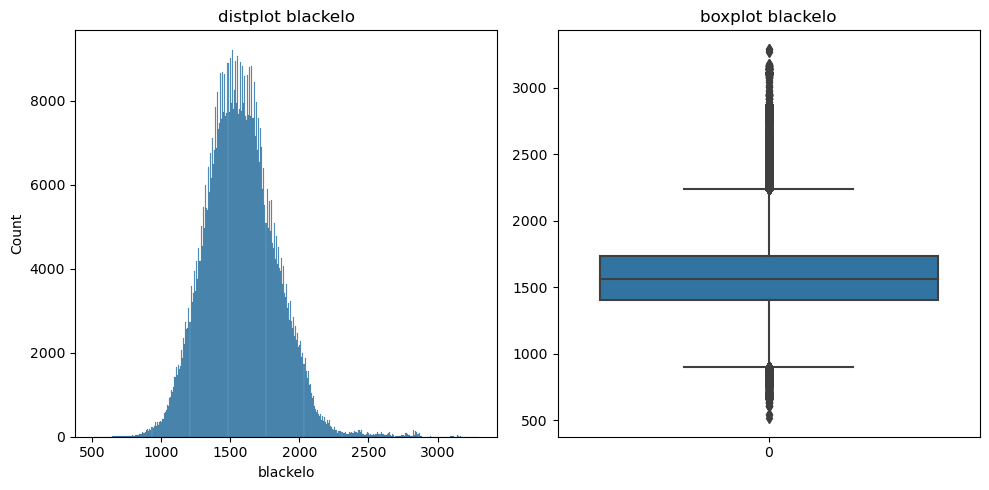

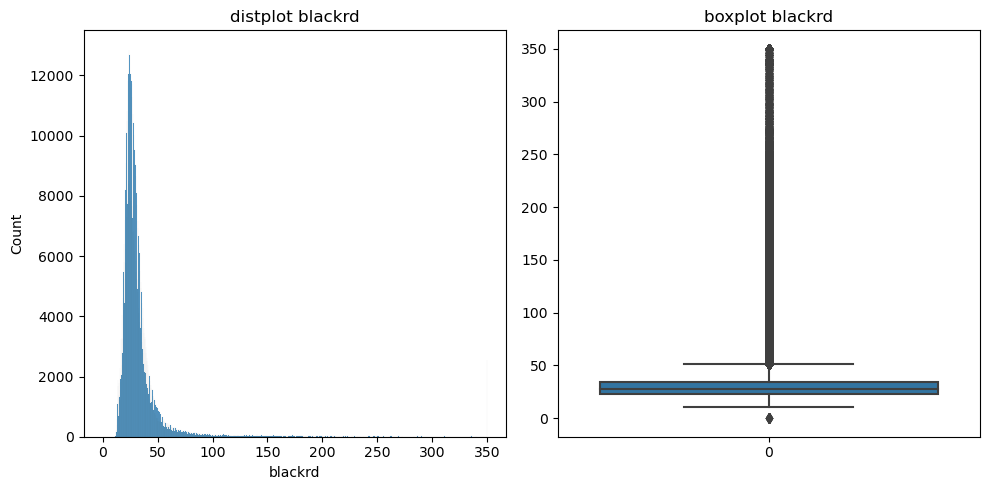

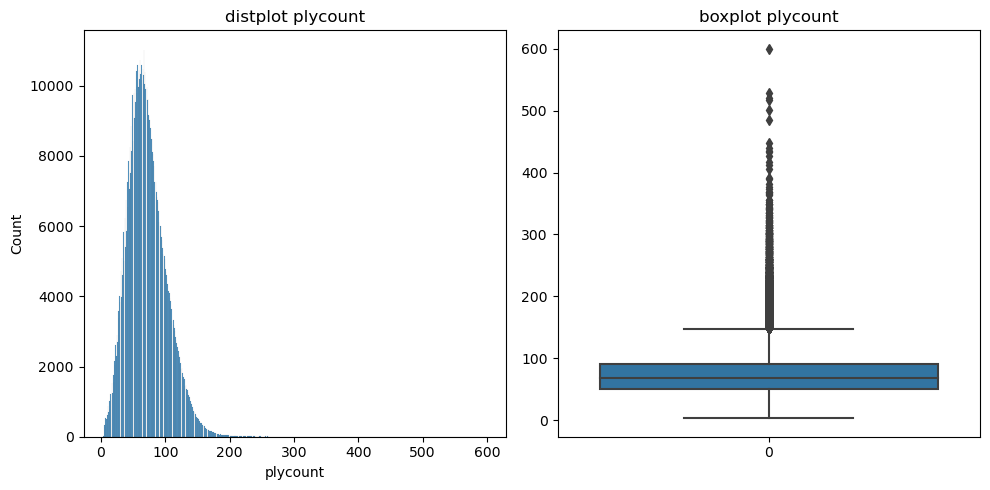

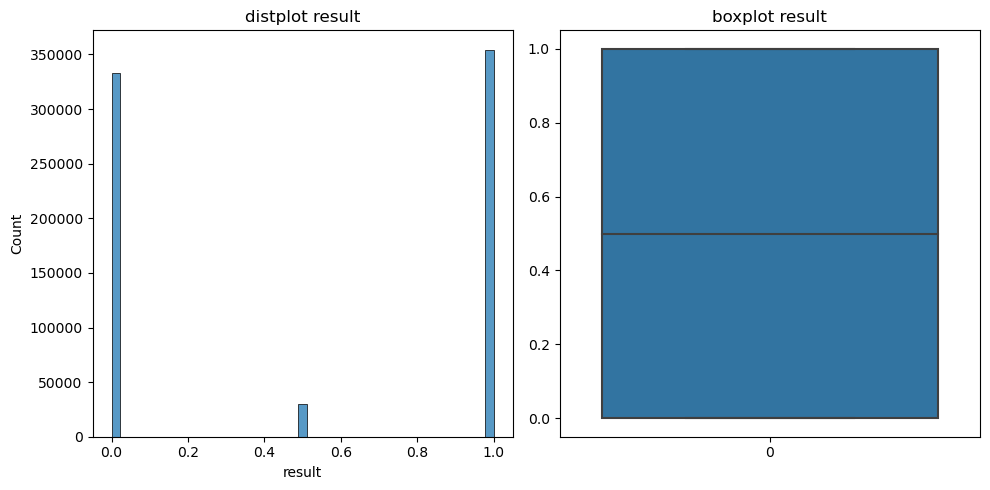

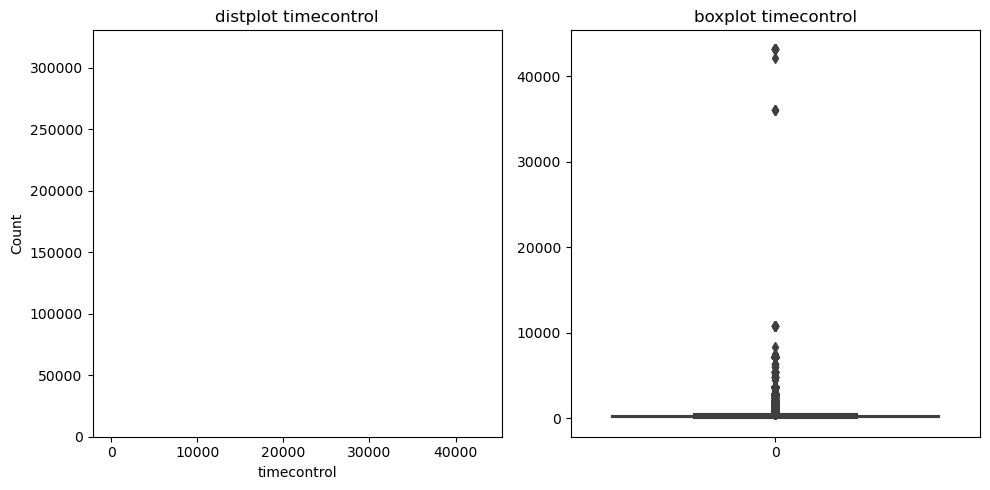

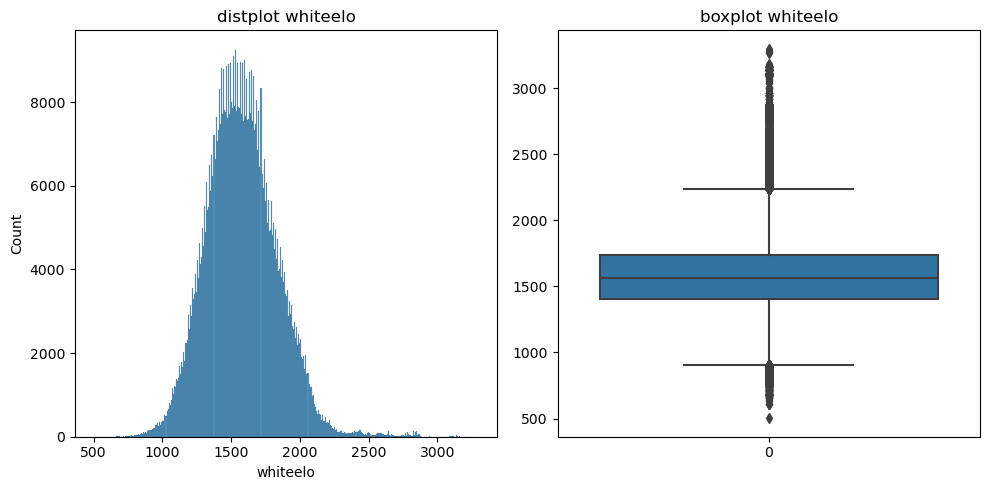

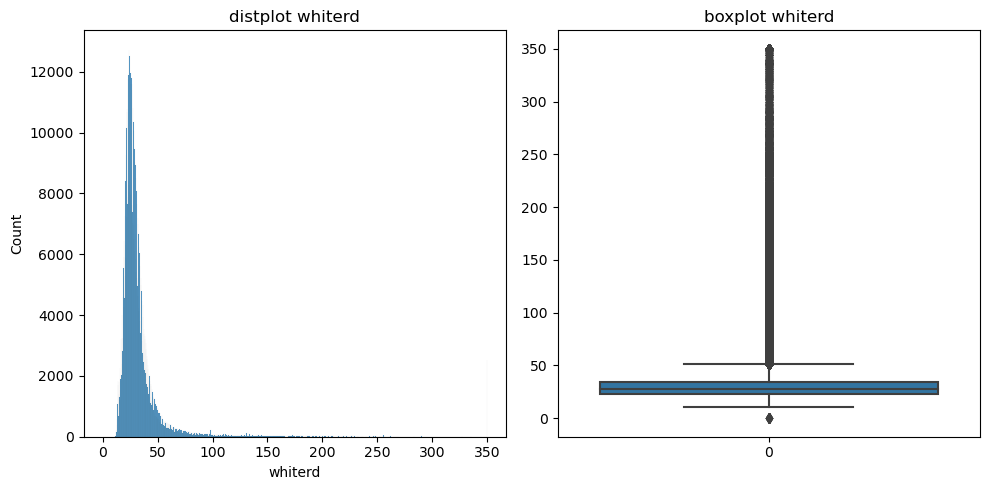

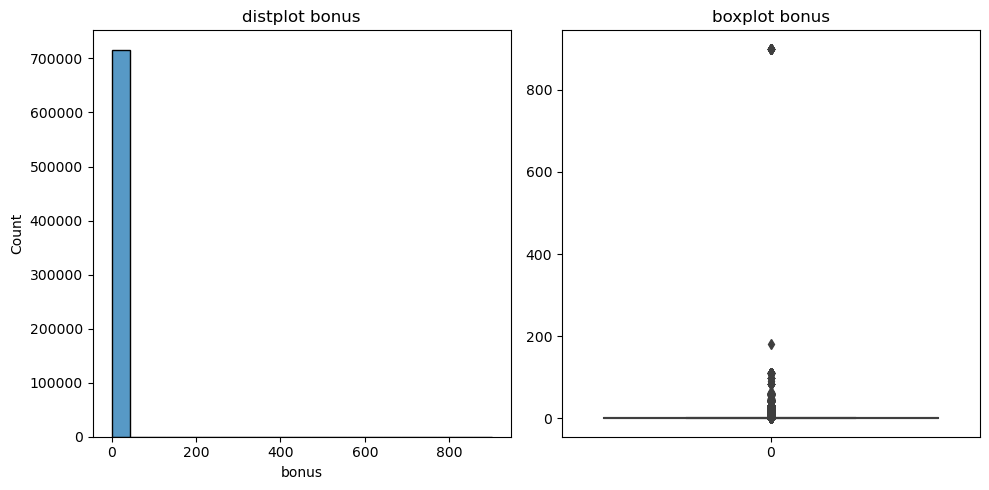

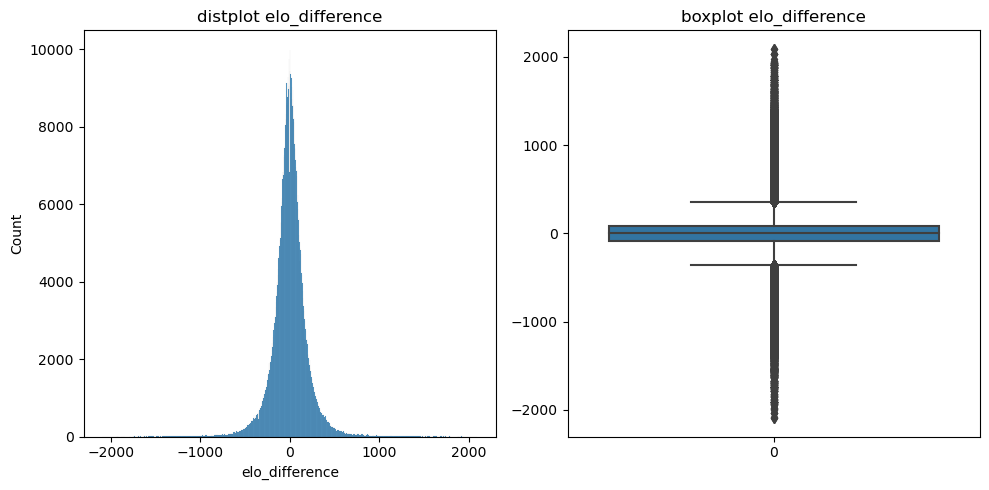

In [67]:
for column in fics_num.columns:
 
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1,2,1)
    sns.histplot(fics_num[column])
    plt.title(f"distplot {column}")
    
    plt.subplot(1,2,2)
    sns.boxplot(fics_num[column])
    plt.title(f"boxplot {column}")
    
    plt.tight_layout()
    plt.show()

Let's also look for correlations between these columns.

As might be expected, we see the following correlations:

- blackelo / whiteelo - strong positive - players tend to play against similarly matched opponents
- whiteelo / elo_difference - positive - the difference of ratings of opponents increases as the ratings increase
- blackelo / elo_difference - negative - this is inverse to above due to the elo_difference calculation
- timecontrol / bonus - positive - longer games have a longer time reward per turn taken

The only feature to correlate significantly with the result is:

- elo_difference / result - positive - if a player is significantly better rated than their opponent, they are more likely to win

The following correlations are reasonably strong but I cannot account for them:

- blackrd / whiterd - positive - I cannot explain this (it is not explained by a correlation with blackelo)
- blackrd / timecontrol - I cannot explain this
- whiterd / timecontrol - I cannot explain this

blackelo   blackrd  plycount    result  timecontrol  whiteelo  \
blackelo        1.000000  0.031060  0.084656 -0.135512     0.042447  0.696348   
blackrd         0.031060  1.000000 -0.039020  0.025719     0.477187  0.076758   
plycount        0.084656 -0.039020  1.000000 -0.033393     0.032033  0.069328   
result         -0.135512  0.025719 -0.033393  1.000000     0.003253  0.133240   
timecontrol     0.042447  0.477187  0.032033  0.003253     1.000000  0.042255   
whiteelo        0.696348  0.076758  0.069328  0.133240     0.042255  1.000000   
whiterd         0.073866  0.478983 -0.038911 -0.023114     0.480934  0.028227   
bonus          -0.091661  0.067632 -0.024038  0.001825     0.292448 -0.091979   
elo_difference -0.391862  0.058499 -0.019870  0.344866    -0.000357  0.387433   

                 whiterd     bonus  elo_difference  
blackelo        0.073866 -0.091661       -0.391862  
blackrd         0.478983  0.067632        0.058499  
plycount       -0.038911 -0.024038       -0.019870  
result         -0.023114  0.001825        0.344866  
timecontrol     0.480934  0.292448       -0.000357  
whiteelo        0.028227 -0.091979        0.387433  
whiterd         1.000000  0.069221       -0.058698  
bonus           0.069221  1.000000       -0.000168  
elo_difference -0.058698 -0.000168        1.000000

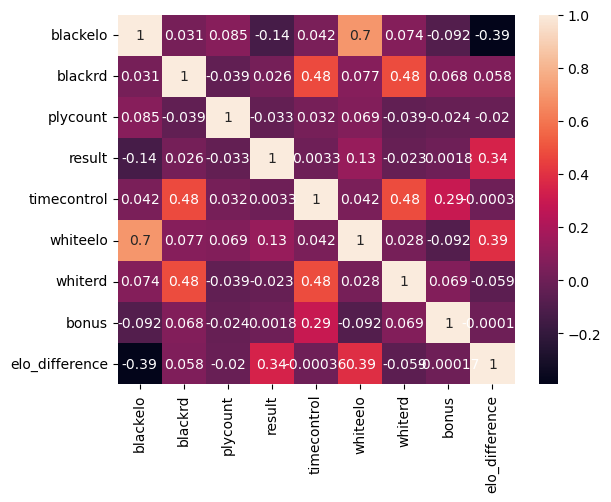

In [71]:
correlations_matrix = fics_num.corr()
display(correlations_matrix)

sns.heatmap(correlations_matrix, annot=True)
plt.show()

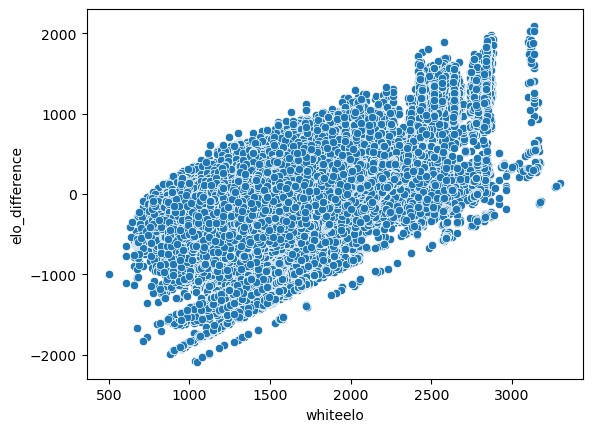

In [82]:
sns.scatterplot(data=fics_num, x="whiteelo", y="elo_difference")
plt.show()

Let's also review those categoric columns with the fewest unique values graphically.

There aren't enough unrated events to warrant keeping these as separate categories, so I will consolidate them into 'blitz', 'standard' and 'lightning'.

There are also only 8 "untimed" games. For simplicity, we will give these the modal values:
- 'event' = blitz
- 'timecontrol' = 180

In [79]:
fics.groupby(['event','timecontrol']).agg({'movetext':pd.Series.nunique}).sort_values(by=['event','movetext'], ascending=[True,False])

movetext
event                       timecontrol          
FICS rated blitz game       180            319753
                            300            178677
                            120             26146
                            600             23666
                            240              7831
                            360              4449
                            60               3807
                            0                2573
                            420              1614
                            480               779
                            720               417
                            840               257
                            660               197
                            540                94
                            780                54
FICS rated lightning game   60              77164
                            120              5632
                            0                1878
FICS rated standard game    900             57560
                            1200             4844
                            3600             4449
                            1800             2472
                            600              2249
                            1500              864
                            720               836
                            2700              291
                            300               276
                            2400              178
                            1080              163
                            660               119
                            960               113
                            1620               73
                            4800               63
                            180                58
                            540                55
                            360                53
                            5400               42
                            1380               35
                            1140               30
                            780                26
                            480                25
                            120                23
                            3000               23
                            420                22
                            1020               18
                            1740               17
                            840                16
                            1980               16
                            1680               14
                            43200              14
                            60                 13
                            1920               12
                            2100               11
                            10800              11
                            240                 8
                            1320                8
                            0                   7
                            1860                7
                            36000               7
                            6300                4
                            1560                3
                            2640                3
                            7200                3
                            1260                2
                            1440                2
                            6000                2
                            2040                1
                            2580                1
                            3300                1
                            3960                1
                            7500                1
                            8340                1
                            26580               1
                            42180               1
FICS unrated blitz game     300              2583
                            180              2210
                            120              1217
                            600              1002
                            240          

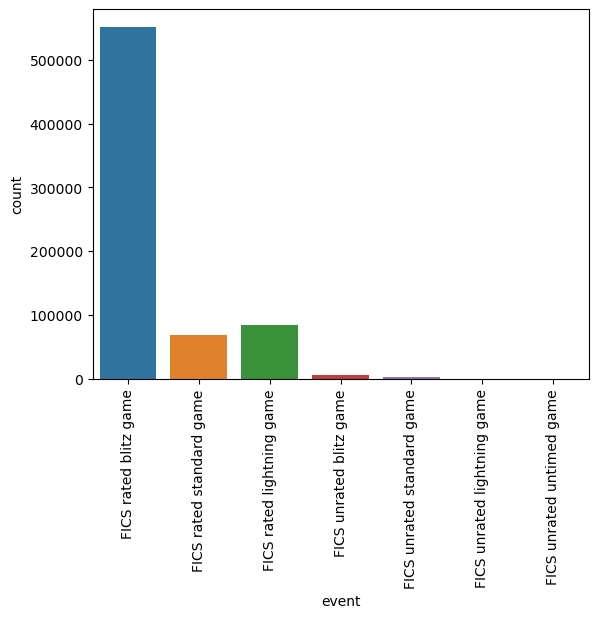

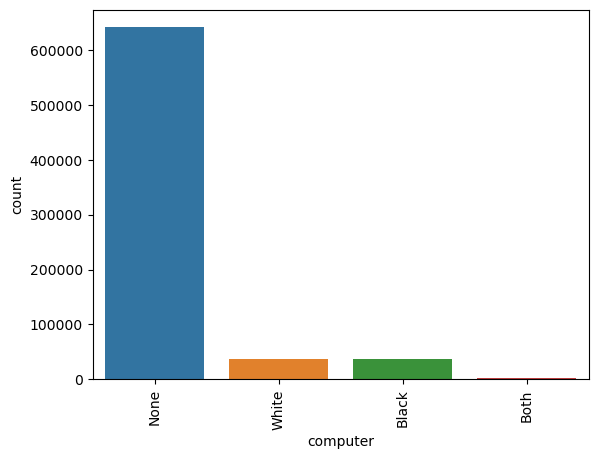

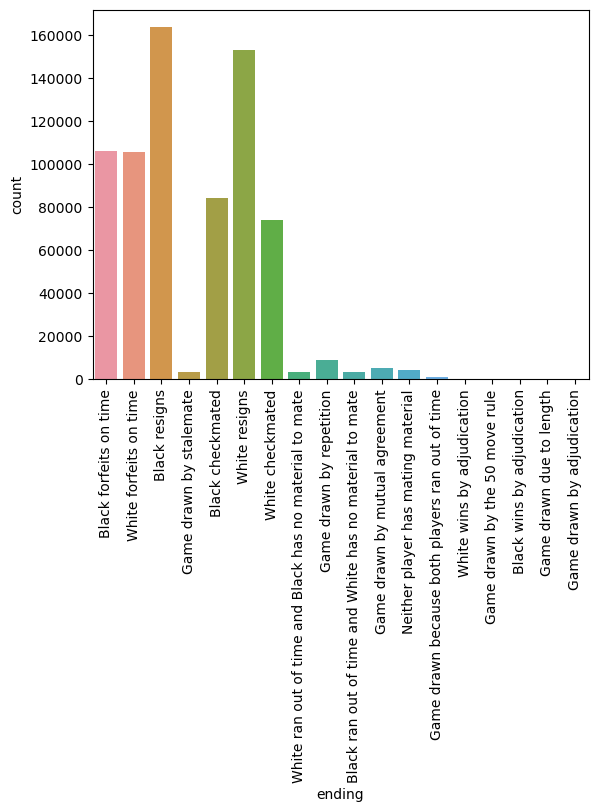

In [34]:
fics_cat_col_to_plot = ['event','computer','ending']
for column in fics_cat_col_to_plot:
    sns.countplot(data=fics_cat, x=column)
    plt.xticks(rotation = 90)
    plt.show()

### A very simple Predictive Model

Let's make a very simple predictive model to give the likely outcome of a game based on the following criteria:
- whiteelo
- whiterd
- elo_difference
- plycount
- computer
- event
- timecontrol

We will start with the fics_filtered dataset to eliminate all games that ended prematurely, and then filter further based on our findings above.

In [99]:
display(fics_filtered.shape)
fics_filtered.head()

(716639, 19)

blackelo  blackrd  eco                     event  \
0      1696     48.0  A00     FICS rated blitz game   
1      1818     36.9  D06  FICS rated standard game   
2      1495     33.6  B07     FICS rated blitz game   
3      1470     32.2  D06  FICS rated standard game   
4      1410     32.4  C44     FICS rated blitz game   

                                            movetext  plycount  result  \
0  1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...        65     1.0   
1  1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...        68     0.0   
2  1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...        77     1.0   
3  1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...        33     1.0   
4  1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...        83     1.0   

   timecontrol  whiteelo  whiterd computer  bonus            datetime  \
0          300      1704     18.0     None      0 2018-01-31 23:52:00   
1          720      1679     40.7     None     10 2018-01-31 23:29:00   
2          180      1553     17.6     None      0 2018-01-31 23:54:00   
3          900      1422    140.5     None      0 2018-01-31 23:53:00   
4           60      1264     42.6     None     10 2018-01-31 23:44:00   

   elo_difference pair01   pair02    pair03    pair04                  ending  
0               8  b4 d5  Bb2 Bf5    e3 Nf6    Ne2 g6  Black forfeits on time  
1            -139  d4 d5   c4 Nf6   Nf3 Bf5  Qb3 Nfd7  White forfeits on time  
2              58  e4 d6  Nf3 Nd7    Bb5 c6  Be2 Ngf6  Black forfeits on time  
3             -48  d4 d5   c4 Bf5  Nc3 dxc4   Bf4 Nc6           Black resigns  
4            -146  e4 e5  Nf3 Nc6     h3 h6    a3 Nf6  Black forfeits on time

In [98]:
model_data = fics_filtered.copy()

In [103]:
model_data['timecontrol']=np.where(model_data['event']=='FICS unrated untimed game','180',model_data['timecontrol'])
model_data['event']=np.where(model_data['event']=='FICS unrated untimed game','FICS rated blitz game',model_data['event'])

model_data['event']=model_data['event'].replace({'FICS rated blitz game':'blitz',
                                                  'FICS unrated blitz game':'blitz',
                                                  'FICS rated standard game':'standard',
                                                  'FICS unrated standard game':'standard',
                                                  'FICS rated lightning game':'lightning',                                                  
                                                  'FICS unrated lightning game':'lightning'})

In [105]:
model_data = model_data[['whiteelo','whiterd','elo_difference','plycount','computer','event','timecontrol']]

### Grouping data by ELO

### Evaluating Optimal Openings

In [61]:
pd.set_option('display.max_rows', None)
fics_filtered.groupby(['pair01','pair02']).agg({'movetext':pd.Series.nunique,'result':np.mean}).sort_values(by='movetext', ascending=False)

movetext    result
pair01  pair02                                                 
e4 e5   Nf3 Nc6                                 48301  0.529670
        Nf3 d6                                  19615  0.570560
e4 c5   Nf3 Nc6                                 17831  0.501394
e4 d5   exd5 Qxd5                               17177  0.515085
e4 c5   Nf3 d6                                  15720  0.499428
e4 e6   d4 d5                                   15060  0.505876
d4 d5   c4 e6                                   11302  0.558930
e4 c6   d4 d5                                   10050  0.493986
d4 d5   c4 c6                                    9007  0.542928
e4 c5   Nf3 e6                                   8440  0.494496
e4 e5   f4 exf4                                  7812  0.540745
        Nf3 Nf6                                  7227  0.529221
d4 Nf6  c4 e6                                    6886  0.502466
d4 d5   c4 dxc4                                  6411  0.604997
e4 g6   d4 Bg7                                   6230  0.511652
d4 Nf6  c4 g6                                    6185  0.507598
e4 e6   Nf3 d5                                   5909  0.465138
e4 e5   d4 exd4                                  5897  0.548814
e4 d5   exd5 Nf6                                 5811  0.467210
e4 e5   Bc4 Nf6                                  5277  0.496404
e4 c5   d4 cxd4                                  5127  0.494247
d4 d5   Nf3 Nf6                                  4886  0.506343
e4 d6   d4 Nf6                                   4388  0.487936
e4 Nf6  e5 Nd5                                   4303  0.473397
e4 e5   Bc4 Nc6                                  4216  0.520090
e4 c6   Nf3 d5                                   4136  0.420327
d4 d5   c4 Nf6                                   4088  0.612280
e4 c5   Nc3 Nc6                                  3898  0.495419
        Bc4 e6                                   3622  0.444230
d4 Nf6  Nf3 g6                                   3436  0.411525
e4 b6   d4 Bb7                                   3407  0.575829
d4 d5   Nf3 e6                                   3234  0.543995
        e3 Nf6                                   3220  0.489296
d4 g6   c4 Bg7                                   2944  0.518852
e4 e5   Nc3 Nc6                                  2842  0.537988
e4 c5   Bc4 Nc6                                  2689  0.460022
e4 e5   f4 Nc6                                   2667  0.550975
e4 g6   Nf3 Bg7                                  2645  0.490359
d4 e6   c4 d5                                    2613  0.573259
d4 Nf6  c4 c5                                    2585  0.479118
        Nf3 e6                                   2570  0.493779
e4 e5   f4 d6                                    2506  0.583400
d4 d5   e3 e6                                    2385  0.529560
        Nf3 Nc6                                  2308  0.490685
e4 e5   Bc4 d6                                   2302  0.524533
        Nc3 Nf6                                  2206  0.514726
        f4 d5                                    1982  0.496720
e4 c5   f4 Nc6                                   1883  0.496814
        Nf3 g6                                   1870  0.484517
e4 e5   Nf3 d5                                   1867  0.503210
e4 c5   Nc3 d6                                   1834  0.496728
e4 e5   Nf3 f5                                   1824  0.489589
        Bc4 Bc5                                  1801  0.527177
e4 c5   Nc3 e6                                   1780  0.501404
d4 d5   Nf3 c6                                   1752  0.517979
        Bf4 Nf6                                  1682  0.506243
c4 e5   Nc3 Nf6                                  1677  0.531008
e4 e5   d3 Nc6                                   1649  0.470285
        Nf3 Bc5                                  1646  0.577461
d4 d5   Nc3 Nf6                                  1640  0.504570
e4 e6   d4 b6                                    1637  0.563836
e4 b6   Nf3 B